In [14]:
# !mamba install ocetrac

<!-- background: #fff4e3-->
<!-- color: #2d2422 -->
[![Binder](https://binder.pangeo.io/badge_logo.svg)](https://binder.pangeo.io/v2/gh/hscannell/default-binder/ocetrac?urlpath=git-pull%3Frepo%3Dhttps%253A%252F%252Fgithub.com%252Focetrac%252Fscipy2021-talk%26urlpath%3Dlab%252Ftree%252Fscipy2021-talk%252F%26branch%3Dmain)
<div align="center">
    <img src="./images/ocetrac_logo_transparent.png" width=300/>
    <h4><span style="font:tradegothic; color:gray">Morphological image processing for monitoring ocean temperature extremes</span></h4>
    <hr>
</div>


<div align="center">
    <h4><span style="font:futura; color:purple">Hillary Scannell<sup>1</sup></span><span style="font:futura; style=color:black">, Luanne Thompson<sup>2</sup>, Daniel Whitt<sup>3</sup>, David John Gagne<sup>4</sup>, Ryan Abernathey<sup>1</sup> & Julius Busecke<sup>1</sup></span></h4>
    <h6><span style="font:tradegothic; color:gray"><sup>1</sup>Lamont-Doherty Earth Observatory, Columbia University, Palisades, NY, USA</span></h6>
    <h6><span style="font:tradegothic; color:gray"><sup>2</sup>School of Oceanography, University of Washington, Seattle, WA, USA</span></h6>
    <h6><span style="font:tradegothic; color:gray"><sup>3</sup>NASA Ames Research Center, Mountain View, CA, USA</span></h6>
    <h6><span style="font:tradegothic; color:gray"><sup>4</sup>National Center for Atmospheric Research, Boulder, CO, USA</span></h6>
</div>
<br>
<br>

<div align="center">
    <img src="./images/title_footer.png" width=100%/>
</div>
<br>

<!-- background: #fff4e3-->
<!-- color: #2d2422 -->
<div align="center">
    <h2>Abstract</h2>
     <hr>
</div>
Dangerous hot-water events, called marine heatwaves, cause prolonged periods of thermal stress in the marine environment that can lead to widespread coral bleaching, harmful algal blooms, unproductive fisheries, and even economic loss. Anticipating the paths of destructive marine heatwaves remains a challenge owing to the complex spatiotemporal evolution of these events. We present a novel open source package called Ocetrac that implements morphological image processing and tracking to aid in the analysis of marine heatwave detection and movement. We discuss how this approach can be applied to monitor other extreme ocean conditions, such as deoxygenation and acidification.
<br>

<!-- background: #fff4e3-->
<!-- color: #2d2422 -->
<div align="center">
    <img src="./images/warming_trend_space.png" width=100%/>
</div>

<!-- background: #fff4e3-->
<!-- color: #2d2422 -->
<div align="center">
    <img src="./images/trend_as_map.png" width=100%/>
    <h2><span style="font:futura; color:black">Warming is not spatially homogenous</span></h2>
</div>

<!-- background: #fff4e3-->
<!-- color: #2d2422 -->
<div align="center">
    <h2><span style="font:futura; color:black">Many species can cope with natural temperature fluctuations</span></h2>
    <img src="./images/natural_temp.png" width=90%/>
</div>


<!-- background: #fff4e3-->
<!-- color: #2d2422 -->
<div align="center">
    <img src="./images/migratory.png" width=80%/>
</div>


<!-- background: #fff4e3-->
<!-- color: #2d2422 -->
<div align="center">
    <h2><span style="font:futura; color:black">As temperatures rise, heat extremes become more deadly</span></h2>
    <img src="./images/anthropogenic_temp.png" width=100%/>
</div>


<!-- background: #fff4e3-->
<!-- color: #2d2422 -->
<div align="center">
    <img src="./images/impacts.png" width=80%/>
</div>


<!-- background: #fff4e3-->
<!-- color: #2d2422 -->
<div align="center">
    <h2><span style="font:futura; color:black">We define these hot water events as Marine Heatwaves</span></h2>
    <img src="./images/mhw_explanation.png" width=100%/>
</div>

<!-- background: #fff4e3-->
<!-- color: #2d2422 -->
<div align="center">
    <h2><span style="font:futura; color:black">Marine heatwaves occur throughout the global ocean</span></h2>
    <img src="./images/Frolicher_Laufkotter.png" width=100%/>
</div>

In [1]:
import ocetrac

<!-- background: #fff4e3-->
<!-- color: #2d2422 -->
<div align="center">
    <h2>Motivation & Goals of Ocetrac</h2>
     <hr>
</div>
Motivation – Better understand the spatiotemporal evolution of marine heatwaves

Feature Extraction

Identify candidate points by eliminating those that do not satisfy a prescribed set of thresholds

Object Detection

Determine whether a closed contour exists around a cluster of candidate points.
Remove small isolated clusters as well as fill small holes within larger clusters.
Eliminate closed contour object that do no meet a prescribed size threshold

Multiple Object Tracking

Stitch connected objects in time, allowing them to split and merge
Produce a new labeled dataset of marine heatwaves events


In [2]:
import xarray as xr
import s3fs

endpoint_url = 'https://ncsa.osn.xsede.org'
fs_osn = s3fs.S3FileSystem(anon=True, client_kwargs={'endpoint_url': endpoint_url},) # Data is on Pangeo - Amazon S3 cloud storage

path = "Pangeo/pangeo-forge/noaa_oisst/v2.1-avhrr.zarr"
ds = xr.open_zarr(fs_osn.get_mapper(path), consolidated=True)
print(ds)

<xarray.Dataset>
Dimensions:  (lat: 720, lon: 1440, time: 14532, zlev: 1)
Coordinates:
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
  * time     (time) datetime64[ns] 1981-09-01T12:00:00 ... 2021-06-14T12:00:00
  * zlev     (zlev) float32 0.0
Data variables:
    anom     (time, zlev, lat, lon) float32 dask.array<chunksize=(20, 1, 720, 1440), meta=np.ndarray>
    err      (time, zlev, lat, lon) float32 dask.array<chunksize=(20, 1, 720, 1440), meta=np.ndarray>
    ice      (time, zlev, lat, lon) float32 dask.array<chunksize=(20, 1, 720, 1440), meta=np.ndarray>
    sst      (time, zlev, lat, lon) float32 dask.array<chunksize=(20, 1, 720, 1440), meta=np.ndarray>
Attributes:
    Conventions:                CF-1.6, ACDD-1.3
    cdm_data_type:              Grid
    comment:                    Data was converted from NetCDF-3 to NetCDF-4 ...
    creator_email:              oisst-help@

In [3]:
from dask_gateway import Gateway
from dask.distributed import Client

gateway = Gateway()
cluster = gateway.new_cluster()
cluster.adapt(minimum=1, maximum=20)
cluster


In [4]:
client = Client(cluster)
client

Client Scheduler: gateway://traefik-gcp-uscentral1b-prod-dask-gateway.prod:80/prod.d919e3a8588d4baca6c43a389dfaa019 Dashboard: /services/dask-gateway/clusters/prod.d919e3a8588d4baca6c43a389dfaa019/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


In [10]:
sst_timeseries = ds.sst.mean(dim=('lat','lon')).load()

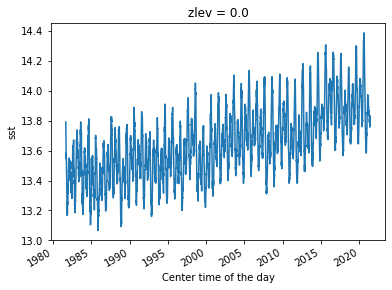

In [11]:
sst_timeseries.plot()

<ipython-input-9-b307499041fc>:13: DeprecationWarning: The background_patch property is deprecated. Use GeoAxes.patch instead.
  ax.background_patch.set_visible(False)


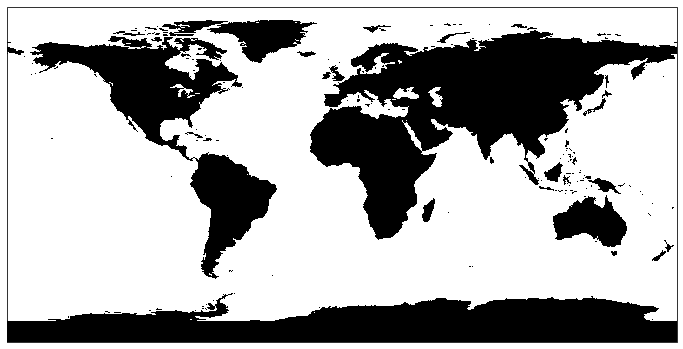

In [9]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Define a mask
mask = ds.sst.isel(time=0, zlev=0).fillna(-999)
mask = mask.where(mask==-999, other = 1)
mask = mask.where(mask==1, other = 0)

plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.PlateCarree())
mask.plot(transform=ccrs.PlateCarree(), vmin=0, vmax=1, cmap='Greys_r', extend='max', add_colorbar=False, label=False)
ax.set_title('')
ax.background_patch.set_visible(False)